In [2]:
import os
import tarfile
import urllib
import pandas as pd

In [80]:
def load_flat_data():
    return pd.read_csv("E:\ITMOflat2021\data.csv")

In [81]:
flat = load_flat_data()

In [82]:
flat.head()

,index,kitchen_area,bath_area,other_area,gas,hot_water,central_heating,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,extra_area_type_name,district_name,rooms_count,price
0,0,19,19,11.709233,No,Yes,Yes,12,1,1942,3.98,5,2,53.709233,2,loggia,Petrogradskij,0,8366331
1,1,17,21,65.196263,No,Yes,Yes,3,1,1959,2.50,9,9,104.196263,2,balcony,Kirovskij,6,11004979
2,2,26,31,11.816443,Yes,Yes,No,13,0,1999,4.92,14,14,73.149777,2,balcony,Krasnoselskij,1,7780920
3,3,12,31,28.539965,Yes,No,Yes,8,1,1936,2.50,3,3,74.206632,2,loggia,Nevskij,2,9682538
4,4,15,30,26.616288,No,Yes,Yes,11,1,2012,3.80,11,4,75.282955,2,balcony,Centralnyj,1,11304146


In [83]:
flat.tail()

,index,kitchen_area,bath_area,other_area,gas,hot_water,central_heating,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,extra_area_type_name,district_name,rooms_count,price
99995,99995,19,14,12.268533,Yes,Yes,Yes,13,2,2002,2.50,18,18,49.601866,1,balcony,Krasnoselskij,0,5538427
99996,99996,22,13,11.377047,Yes,Yes,Yes,9,1,1915,3.87,2,1,49.377047,1,loggia,Petrogradskij,0,7602367
99997,99997,22,21,12.520022,No,No,Yes,19,0,1954,2.50,7,1,61.853355,2,loggia,Petrogradskij,1,8687231
99998,99998,11,16,43.556108,No,Yes,Yes,11,1,1996,2.50,9,4,74.222775,2,loggia,Centralnyj,4,10838866
99999,99999,16,21,64.303288,Yes,Yes,Yes,5,1,1947,2.50,5,1,102.969954,2,loggia,Krasnoselskij,5,10852292


In [84]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 100000 non-null  int64  
 1   kitchen_area          100000 non-null  int64  
 2   bath_area             100000 non-null  int64  
 3   other_area            100000 non-null  float64
 4   gas                   100000 non-null  object 
 5   hot_water             100000 non-null  object 
 6   central_heating       100000 non-null  object 
 7   extra_area            100000 non-null  int64  
 8   extra_area_count      100000 non-null  int64  
 9   year                  100000 non-null  int64  
 10  ceil_height           100000 non-null  float64
 11  floor_max             100000 non-null  int64  
 12  floor                 100000 non-null  int64  
 13  total_area            100000 non-null  float64
 14  bath_count            100000 non-null  int64  
 15  e

In [85]:
flat.isnull().sum()

index                   0
kitchen_area            0
bath_area               0
other_area              0
gas                     0
hot_water               0
central_heating         0
extra_area              0
extra_area_count        0
year                    0
ceil_height             0
floor_max               0
floor                   0
total_area              0
bath_count              0
extra_area_type_name    0
district_name           0
rooms_count             0
price                   0
dtype: int64

In [86]:
flat["gas"].value_counts()

Yes    50029
No     49971
Name: gas, dtype: int64

In [87]:
flat["hot_water"].value_counts()

Yes    64787
No     35213
Name: hot_water, dtype: int64

In [88]:
flat["central_heating"].value_counts()

Yes    89968
No     10032
Name: central_heating, dtype: int64

In [28]:
flat["extra_area"].value_counts().sort_values()

0     2428
20    2484
15    4899
7     4945
18    4957
12    4961
10    4967
9     4976
5     4982
17    4989
2     4992
16    4999
11    5003
3     5003
13    5018
1     5029
19    5034
14    5038
4     5047
8     5122
6     5127
Name: extra_area, dtype: int64

In [89]:
flat["extra_area_type_name"].value_counts()

balcony    50155
loggia     49845
Name: extra_area_type_name, dtype: int64

In [90]:
flat["district_name"].value_counts()

Kirovskij        14447
Petrogradskij    14392
Krasnoselskij    14350
Moskovskij       14276
Centralnyj       14203
Vyborgskij       14182
Nevskij          14150
Name: district_name, dtype: int64

In [91]:
flat.describe()

,index,kitchen_area,bath_area,other_area,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,rooms_count,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,49999.500000,16.499250,21.482350,28.280992,9.990920,1.001090,1960.06910,3.130120,9.073740,5.043840,69.592899,1.699550,1.480480,9.195727e+06
std,28867.657797,5.759919,8.639641,20.476935,5.782708,0.706678,34.60658,0.810827,5.806507,4.251468,23.005842,0.458456,1.717466,3.379607e+06
min,0.000000,7.000000,7.000000,11.000000,0.000000,0.000000,1900.00000,2.500000,1.000000,1.000000,25.647034,1.000000,0.000000,2.757564e+06
25%,24999.750000,11.000000,14.000000,13.011560,5.000000,1.000000,1930.00000,2.500000,4.000000,2.000000,53.222280,1.000000,0.000000,6.744855e+06
50%,49999.500000,17.000000,21.000000,18.984819,10.000000,1.000000,1960.00000,2.510000,8.000000,4.000000,64.518983,2.000000,1.000000,8.496955e+06
75%,74999.250000,21.000000,29.000000,37.171975,15.000000,2.000000,1990.00000,3.760000,13.000000,7.000000,80.716989,2.000000,2.000000,1.096428e+07
max,99999.000000,26.000000,36.000000,90.983329,20.000000,2.000000,2020.00000,5.000000,24.000000,24.000000,159.408240,2.000000,9.000000,2.623385e+07


In [108]:
flat["total_area"].sort_values()

95691     25.647034
91965     26.031452
34531     26.295571
5631      26.366295
5900      26.441628
            ...    
44213    154.054225
30016    154.088597
71181    154.650614
97489    156.827294
87260    159.408240
Name: total_area, Length: 100000, dtype: float64

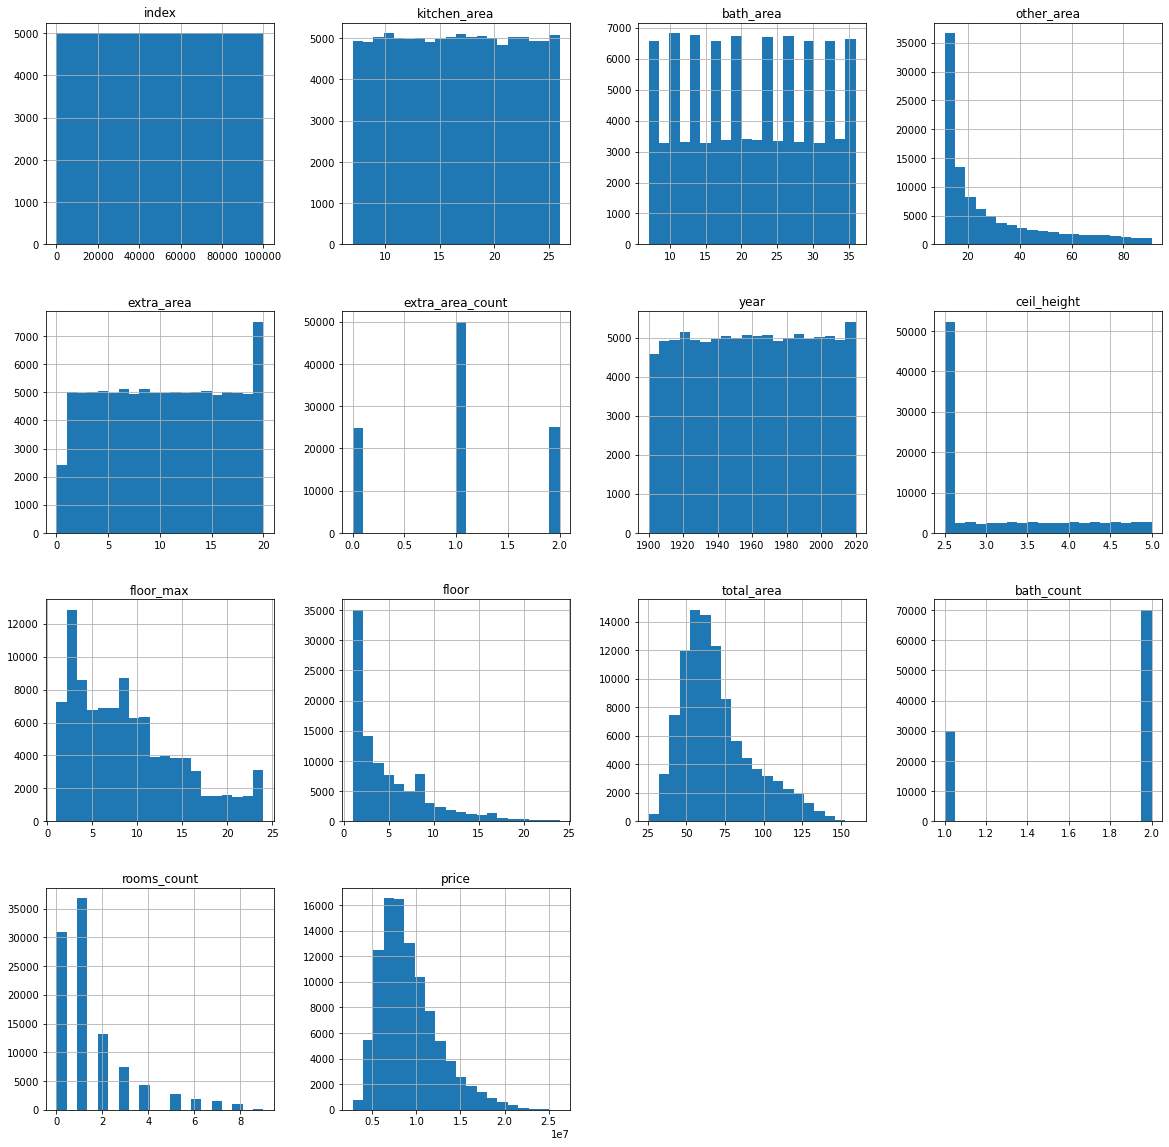

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt 
flat.hist(bins=20, figsize=(20, 20))
plt.show()

In [94]:
flatCopy = flat.copy() #copy of the original dataset

In [95]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

next line of codes will create test different test set on every run. Eventually whole dataset will be in training. So avoiding it using copy. 

In [96]:
train_set, test_set = split_train_test(flatCopy, 0.2) #copy is used to avoid generating different dataset every time from the original dataset

In [97]:
len(train_set)

80000

In [98]:
len(test_set)

20000

In [99]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [100]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(flat, test_size=0.2, random_state=42)

### Creating total area category to ensure instances from each category on test set

In [125]:
flat["total_area_cat"] = pd.cut(flatCopy["total_area"],
                             bins=[25, 50, 75, 100, 125, 150, np.inf],
                             labels=[1, 2, 3, 4, 5, 6])

In [127]:
flat["total_area_cat"].sort_values()

72707    1
24089    1
71247    1
71248    1
71255    1
        ..
84441    6
13145    6
44213    6
21795    6
76470    6
Name: total_area_cat, Length: 100000, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

<AxesSubplot:>

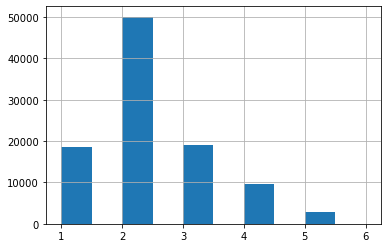

In [128]:
# the categories are below
flat["total_area_cat"].hist()

In [129]:
flat_numerical = flatCopy.drop(['gas', 'hot_water', 'central_heating', 'extra_area_type_name', 'district_name'], axis=1)

In [130]:
flat_numerical.describe()

,index,kitchen_area,bath_area,other_area,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,rooms_count,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,49999.500000,16.499250,21.482350,28.280992,9.990920,1.001090,1960.06910,3.130120,9.073740,5.043840,69.592899,1.699550,1.480480,9.195727e+06
std,28867.657797,5.759919,8.639641,20.476935,5.782708,0.706678,34.60658,0.810827,5.806507,4.251468,23.005842,0.458456,1.717466,3.379607e+06
min,0.000000,7.000000,7.000000,11.000000,0.000000,0.000000,1900.00000,2.500000,1.000000,1.000000,25.647034,1.000000,0.000000,2.757564e+06
25%,24999.750000,11.000000,14.000000,13.011560,5.000000,1.000000,1930.00000,2.500000,4.000000,2.000000,53.222280,1.000000,0.000000,6.744855e+06
50%,49999.500000,17.000000,21.000000,18.984819,10.000000,1.000000,1960.00000,2.510000,8.000000,4.000000,64.518983,2.000000,1.000000,8.496955e+06
75%,74999.250000,21.000000,29.000000,37.171975,15.000000,2.000000,1990.00000,3.760000,13.000000,7.000000,80.716989,2.000000,2.000000,1.096428e+07
max,99999.000000,26.000000,36.000000,90.983329,20.000000,2.000000,2020.00000,5.000000,24.000000,24.000000,159.408240,2.000000,9.000000,2.623385e+07


In [131]:
from sklearn.model_selection import StratifiedShuffleSplit

flatSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in flatSplit.split(flat, flat["total_area_cat"]):
    strat_train_set = flat.loc[train_index]
    strat_test_set = flat.loc[test_index]

In [132]:
strat_test_set["total_area_cat"].value_counts() / len(strat_test_set)

2    0.50080
3    0.19015
1    0.18555
4    0.09555
5    0.02765
6    0.00030
Name: total_area_cat, dtype: float64

In [133]:
flat["total_area_cat"].value_counts() / len(flat)

2    0.50078
3    0.19016
1    0.18555
4    0.09556
5    0.02763
6    0.00032
Name: total_area_cat, dtype: float64

In [134]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("total_area_cat", axis=1, inplace=True)